In [29]:
from numpy import loadtxt
import pandas as pd
import numpy as np
import seaborn as sns

# load the dataset
df = pd.read_csv('Phenotypic_V1_0b_preprocessed1.csv')
df.head()


,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
0,1,50002,1,50002,PITT,no_filename,1,10.201539,1.194664,16.223458,3.878000,0.152711,12.072452
1,2,50003,2,50003,PITT,Pitt_0050003,1,7.165701,1.126752,10.460008,4.282238,0.161716,9.241155
2,3,50004,3,50004,PITT,Pitt_0050004,1,7.698144,1.226218,9.725750,3.881684,0.174186,9.323463
3,4,50005,4,50005,PITT,Pitt_0050005,1,9.071807,1.256278,11.198226,3.628667,0.119269,10.814200
4,5,50006,5,50006,PITT,Pitt_0050006,1,8.026798,1.407166,6.282055,3.674539,0.130647,10.123574


In [30]:
df=df[['anat_cnr','anat_efc','anat_fber','anat_fwhm','anat_qi1','anat_snr','DX_GROUP']]
df.describe()

,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr,DX_GROUP
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1112.000000
mean,11.641527,2.079628,72.804971,3.558793,0.072209,48.185793,1.515288
std,5.612932,11.435278,155.033640,0.676312,0.052283,282.736653,0.499991
min,0.000015,-217.560433,-3.123743,2.533930,0.000451,0.001400,1.000000
25%,8.613273,0.755764,3.898699,3.088846,0.040015,12.262756,1.000000
50%,10.966648,1.675090,10.341742,3.401205,0.060916,15.601842,2.000000
75%,13.181021,3.197335,86.028008,3.831771,0.093534,21.528386,2.000000
max,51.691800,33.318370,1734.146859,5.938324,0.259048,5957.198529,2.000000


In [31]:
#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
anat_cnr     13
anat_efc     13
anat_fber    13
anat_fwhm    13
anat_qi1     13
anat_snr     13
DX_GROUP      0
dtype: int64


In [32]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

anat_cnr : [10.20153877  7.16570147  7.69814438 ...  3.41346894  7.83900677
 12.16929687]
anat_efc : [1.19466382 1.12675161 1.22621772 ... 1.35823764 1.75436261 2.81835195]
anat_fber : [16.22345825 10.4600076   9.72575046 ...  4.33569983 12.27005481
  9.27210712]
anat_fwhm : [3.8780004  4.28223801 3.88168429 ... 3.32455    3.23217    3.51019   ]
anat_qi1 : [0.15271098 0.16171559 0.17418572 ... 0.10948991 0.08396437 0.04430978]
anat_snr : [12.07245188  9.24115456  9.32346277 ...  4.93395956 16.4031739
 23.56598215]
DX_GROUP : [1 2]


In [33]:
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(1112, 7)


<AxesSubplot:xlabel='anat_cnr', ylabel='Count'>

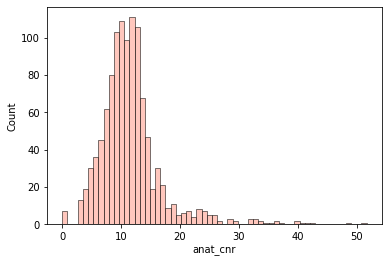

In [34]:
#Histogram of Age distrbution
sns.histplot(data=df,x='anat_cnr',color="#ffb5a7")

<AxesSubplot:>

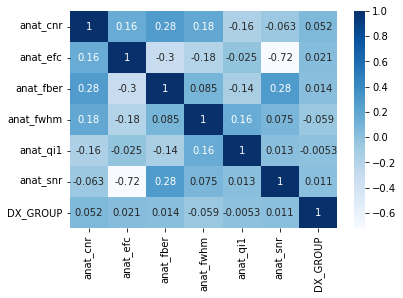

In [35]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

In [36]:
#Replacing categorical data with integer values
df['DX_GROUP'].replace([1,2],['ASD','TD'], inplace=True)

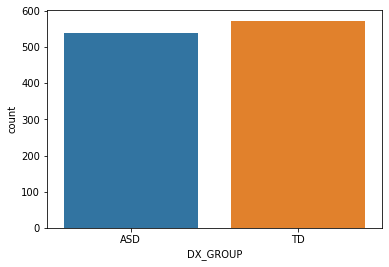

In [37]:
sns.countplot(x = 'DX_GROUP', data = df);


In [38]:
# split into input (X) and output (y) variables
X = np.load("features.npz")['a']
y = np.load("labels.npz")['a']

print(X)

[[ 0.651508    0.36743073  0.31826976 ...  0.56326686  0.53300758
   0.54327946]
 [ 0.53258726  0.3377011   0.49584742 ...  0.40197062  0.18363887
   0.457722  ]
 [ 0.4190768   0.2041985   0.33218378 ...  0.78088126  0.34119973
   0.56367589]
 ...
 [ 0.60767136  0.13870343  0.21027113 ...  0.32434371  0.05419067
   0.42023549]
 [ 0.11514753  0.03477415  0.03612913 ...  0.39019805 -0.09443257
  -0.06281977]
 [ 0.4149792   0.28418048  0.35910961 ...  0.66591602  0.25099767
   0.36904969]]


In [39]:
data = np.load("features.npz")
for key, value in data.items():
    np.savetxt("feature" + key + ".csv", value)